In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\KIIT\PycharmProjects\Py projects\mnist_train.csv')
data

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59994,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data) 

data_dev=data[0:1000].T
Y_dev=data_dev[0]
X_dev=data_dev[1:n]

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]

In [64]:
def init_params():
    W1 = np.random.randn(20, 784) * np.sqrt(1 / 784)  # Xavier initialization
    b1 = np.zeros((20, 1))
    W2 = np.random.randn(10, 20) * np.sqrt(1 / 20)   # Xavier initialization
    b2 = np.zeros((10, 1))
    return W1, b1, W2, b2

def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z))  # for numerical stability
    return exp_Z / np.sum(exp_Z, axis=0)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = sigmoid(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def sigmoid_deriv(Z):
    return sigmoid(Z) * (1 - sigmoid(Z))

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = Y.size
    dZ2 = A2 - one_hot_Y
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * sigmoid_deriv(Z1)
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [65]:
import numpy as np

def get_predictions(A2):
    return np.argmax(A2, axis=0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2


alpha = 0.01
iterations = 1000
W1_final, b1_final, W2_final, b2_final = gradient_descent(X_train, Y_train, alpha, iterations)


Iteration:  0
Accuracy:  0.06279767453685656
Iteration:  10
Accuracy:  0.18947778775911456
Iteration:  20
Accuracy:  0.31014084984491264
Iteration:  30
Accuracy:  0.4050238139629485


KeyboardInterrupt: 

In [66]:
import matplotlib.pyplot as plt

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [7]
Label:  7


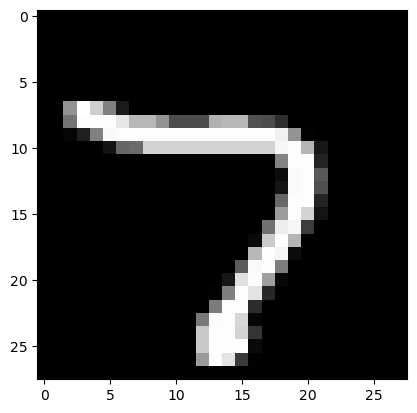

In [82]:
test_prediction(1000, W1_final, b1_final, W2_final, b2_final)


Prediction:  [6]
Label:  6


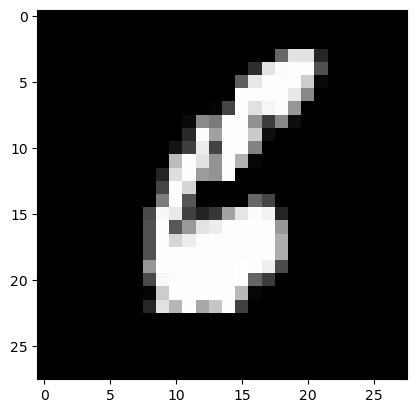

In [41]:
test_prediction(1, W1_final, b1_final, W2_final, b2_final)


Prediction:  [5]
Label:  5


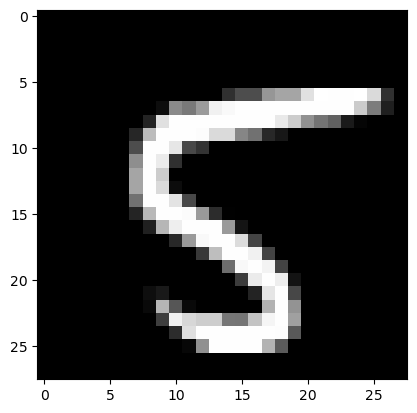

In [15]:
test_prediction(4, W1_final, b1_final, W2_final, b2_final)


Prediction:  [7]
Label:  7


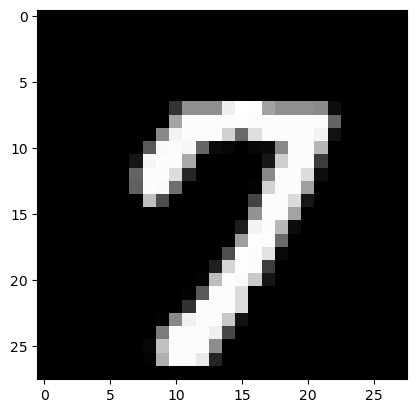

In [17]:
test_prediction(5, W1_final, b1_final, W2_final, b2_final)


Prediction:  [6]
Label:  6


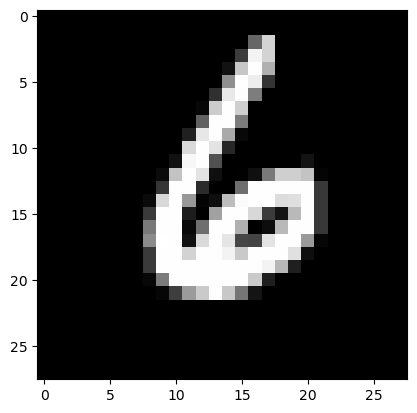

In [62]:
test_prediction(9, W1_final, b1_final, W2_final, b2_final)
